<a href="https://colab.research.google.com/github/nazuna-0/WorkSheets_AshwiniTamang/blob/WorkSheet---2/WorkSheet2_AshwiniTamang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import files

# Upload the bank.csv file
uploaded = files.upload()


import pandas as pd
# Load dataset (filename must match uploaded file)
bank = pd.read_csv("bank.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [47]:
#Checking Data info
# 2a. Check data info
bank.info()

# 2b. Columns with dtype = object
object_cols = bank.select_dtypes(include='object')
print("\nColumns with object dtype:\n", object_cols.columns)

# 2c. Unique values for each object column
for col in object_cols.columns:
    print(f"\nUnique values in {col}:")
    print(bank[col].unique())

# 2d. Null values in each column
print("\nNull values in each column:\n")
print(bank.isnull().sum())

object_cols = bank.select_dtypes(include='object').columns
print("\nColumns with object type:", object_cols)

for col in object_cols:
    print(f"\nUnique values in '{col}': {bank[col].unique()}")

print("\nNull values per column:\n", bank.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with object dtype:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'c

In [11]:
# Drop object dtype columns
bank_numeric = bank.drop(columns=object_cols.columns)

# Show new DataFrame
bank_numeric.head()

# Save to CSV
bank_numeric.to_csv("banknumericdata.csv", index=False)

# Download the file
files.download("banknumericdata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Read the numeric-only dataset
bank_numeric2 = pd.read_csv("banknumericdata.csv")

# Summary statistics
bank_numeric2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Problem 2 : Data Imputations**


In [48]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("medical_students_dataset.csv")
df.head()

Saving medical_students_dataset.csv to medical_students_dataset (7).csv


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [18]:
df.info()

print("\nMissing values in each column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            

In [19]:
# Create a copy for safety
df_filled = df.copy()

for col in df_filled.columns:
    if df_filled[col].isnull().sum() > 0:  # Only if column has missing values

        if df_filled[col].dtype != 'object':
            # numeric column → fill with mean
            df_filled[col].fillna(df_filled[col].mean(), inplace=True)
            print(f"Filled numeric column '{col}' with MEAN")

        else:
            # categorical column → fill with mode
            df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)
            print(f"Filled categorical column '{col}' with MODE")

/tmp/ipython-input-2354414059.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)
/tmp/ipython-input-2354414059.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Filled numeric column 'Student ID' with MEAN
Filled numeric column 'Age' with MEAN
Filled categorical column 'Gender' with MODE
Filled numeric column 'Height' with MEAN
Filled numeric column 'Weight' with MEAN
Filled categorical column 'Blood Type' with MODE
Filled numeric column 'BMI' with MEAN
Filled numeric column 'Temperature' with MEAN
Filled numeric column 'Heart Rate' with MEAN
Filled numeric column 'Blood Pressure' with MEAN
Filled numeric column 'Cholesterol' with MEAN
Filled categorical column 'Diabetes' with MODE
Filled categorical column 'Smoking' with MODE


In [49]:
print("Total duplicates:", df_filled.duplicated().sum())

Total duplicates: 12572


In [21]:
df_cleaned = df_filled.drop_duplicates()
print("Duplicates removed. Final shape:", df_cleaned.shape)

Duplicates removed. Final shape: (187428, 13)


**Problem 1 : Data Cleaning and Transformations with ”Titanic Dataset**


In [35]:
from google.colab import files
uploaded = files.upload()     # Upload your Titanic-Dataset.csv

import pandas as pd
titanic = pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


=== PROBLEM 1 RESULTS ===
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Min Fare: 0.0
Max Fare: 512.3292

=== PROBLEM 2 RESULTS ===
Null Age values in first-class subset: 30

=== PROBLEM 3 RESULTS ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.

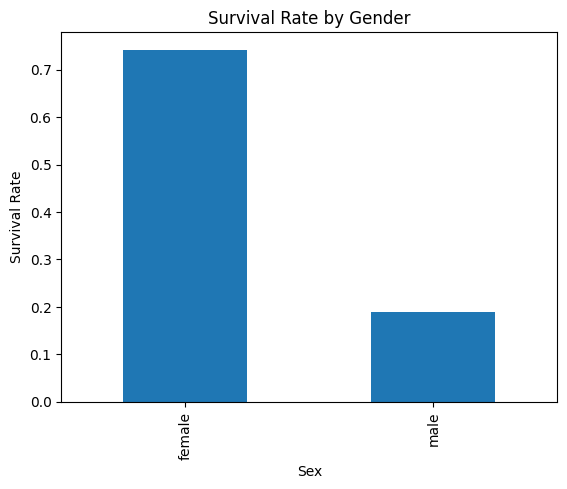


=== PROBLEM 5 RESULTS ===
Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64


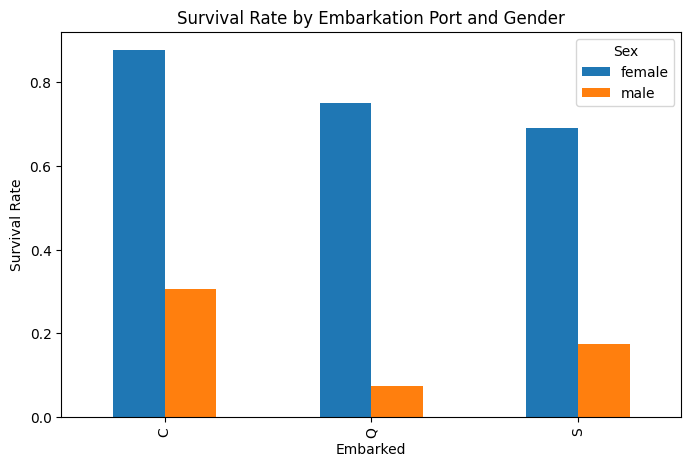


=== PROBLEM 6 RESULTS ===
Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


/tmp/ipython-input-4228176329.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_class = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


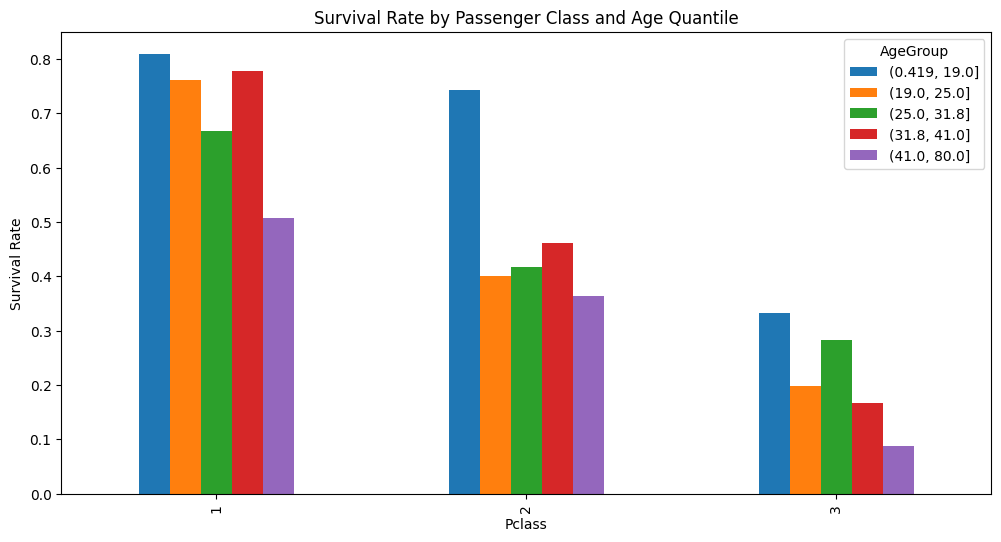

In [24]:
import matplotlib.pyplot as plt

# ================================================================
# PROBLEM 1
# Subset columns + keep Pclass = 1 + Fare stats
# ================================================================
subset = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter only first-class passengers
subset_first = subset[subset['Pclass'] == 1]

# Fare statistics
mean_fare = subset_first['Fare'].mean()
median_fare = subset_first['Fare'].median()
min_fare = subset_first['Fare'].min()
max_fare = subset_first['Fare'].max()

print("=== PROBLEM 1 RESULTS ===")
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Min Fare:", min_fare)
print("Max Fare:", max_fare)



# ================================================================
# PROBLEM 2
# Count null Age values + drop them
# ================================================================
null_age = subset_first['Age'].isnull().sum()
print("\n=== PROBLEM 2 RESULTS ===")
print("Null Age values in first-class subset:", null_age)

# Drop rows with Age = NaN
subset_first_clean = subset_first.dropna(subset=['Age'])



# ================================================================
# PROBLEM 3
# One-hot encode "Embarked"
# ================================================================
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix="Embarked")

# Add new columns
titanic_encoded = pd.concat([titanic, embarked_dummies], axis=1)

# Drop old column
titanic_encoded.drop(columns=['Embarked'], inplace=True)

print("\n=== PROBLEM 3 RESULTS ===")
print(titanic_encoded.head())



# ================================================================
# PROBLEM 4
# Survival rate by Sex + Visualization
# ================================================================
survival_by_sex = titanic.groupby('Sex')['Survived'].mean()
print("\n=== PROBLEM 4 RESULTS ===")
print(survival_by_sex)

survival_by_sex.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()



# ================================================================
# PROBLEM 5
# Survival rate by Embarked + Sex + Visualization
# ================================================================
survival_by_port = titanic.groupby(['Embarked', 'Sex'])['Survived'].mean()
print("\n=== PROBLEM 5 RESULTS ===")
print(survival_by_port)

survival_by_port.unstack().plot(kind='bar', figsize=(8,5))
plt.title("Survival Rate by Embarkation Port and Gender")
plt.ylabel("Survival Rate")
plt.show()



# ================================================================
# PROBLEM 6 (OPTIONAL)
# Survival by Age Quantiles + Pclass + Visualization
# ================================================================
titanic['AgeGroup'] = pd.qcut(titanic['Age'], 5)

survival_age_class = titanic.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print("\n=== PROBLEM 6 RESULTS ===")
print(survival_age_class)

survival_age_class.unstack().plot(kind='bar', figsize=(12,6))
plt.title("Survival Rate by Passenger Class and Age Quantile")
plt.ylabel("Survival Rate")
plt.show()

Number of missing Age values: 177
Rows left after dropping missing Age values: 714

Data after one-hot encoding 'Embarked':
                                                Name  Pclass     Sex   Age  \
0                            Braund, Mr. Owen Harris       3    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                             Heikkinen, Miss. Laina       3  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                           Allen, Mr. William Henry       3    male  35.0   

      Fare  Survived  Embarked_C  Embarked_Q  Embarked_S  
0   7.2500         0       False       False        True  
1  71.2833         1        True       False       False  
2   7.9250         1       False       False        True  
3  53.1000         1       False       False        True  
4   8.0500         0       False       False        True  

Mean survival rate by Sex:
Sex
female    0.754789
ma

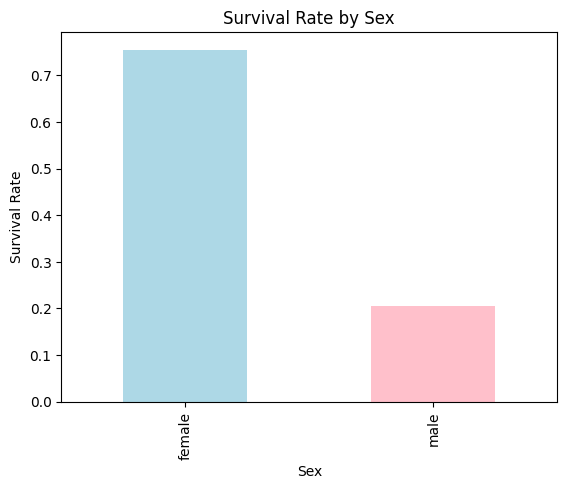


Mean survival rate by Sex and Embarkation Port:
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


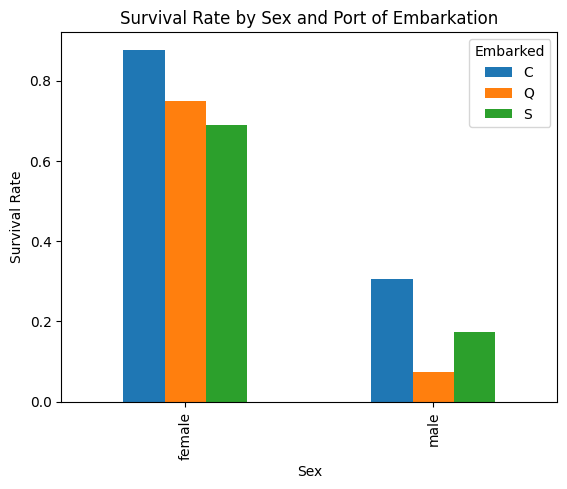

In [28]:

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select only the columns we need
df = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Embarked']]

# --- Problem 2: Count and remove missing Age values ---
# Count missing values in 'Age'
missing_age = df['Age'].isnull().sum()
print("Number of missing Age values:", missing_age)

# Remove rows with missing Age
df = df.dropna(subset=['Age'])
print("Rows left after dropping missing Age values:", len(df))

# --- Problem 3: Convert 'Embarked' to numbers using one-hot encoding ---
# Create new columns for each port
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add new columns to our DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Remove the original 'Embarked' column
df = df.drop('Embarked', axis=1)

# Show first few rows to check
print("\nData after one-hot encoding 'Embarked':")
print(df.head())

# --- Problem 4: Compare survival rates by Sex ---
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nMean survival rate by Sex:")
print(survival_by_sex)

# Plot survival rates by Sex
survival_by_sex.plot(kind='bar', color=['lightblue','pink'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# --- Problem 5: Compare survival by Sex and Embarkation Port ---
# Group by Sex and Embarked using original DataFrame
survival_by_sex_embarked = titanic.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
print("\nMean survival rate by Sex and Embarkation Port:")
print(survival_by_sex_embarked)

# Plot survival by Sex and Embarked
survival_by_sex_embarked.plot(kind='bar')
plt.title('Survival Rate by Sex and Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()